<a href="https://colab.research.google.com/github/sudheervobili/Pytorch/blob/main/home_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Home Loan Prediction (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset from kaggle using CLI

In [3]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp "Kaggle (3).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download taweilo/loan-approval-classification-data
!unzip loan-approval-classification-data.zip

Saving Kaggle (3).json to Kaggle (3).json
Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0
  0% 0.00/751k [00:00<?, ?B/s]
100% 751k/751k [00:00<00:00, 692MB/s]
Archive:  loan-approval-classification-data.zip
  inflating: loan_data.csv           


In [4]:
df = pd.read_csv('loan_data.csv')

In [5]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
df.shape

(45000, 14)

In [7]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Exploratory Data Analysis:
1. Checking Null Values
2. Detecting Outliers in the dataset via Box plot
3. Distribution Over Categorial variables
4. Distribution Over Numerical variables
5. Analyzing Correlation between variables
6. Identifying Important Features that Effects on Targer column

In [12]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

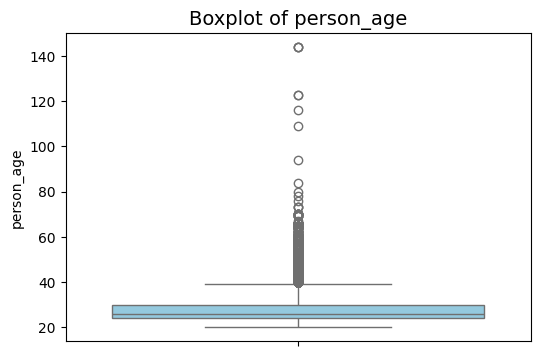

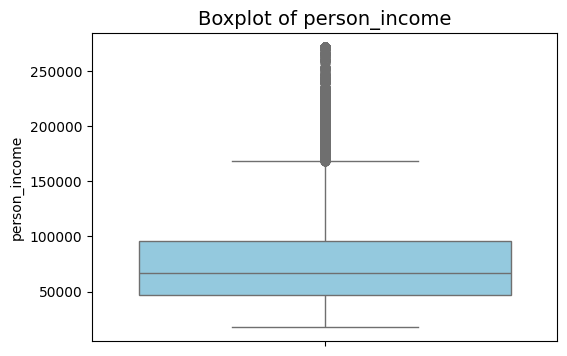

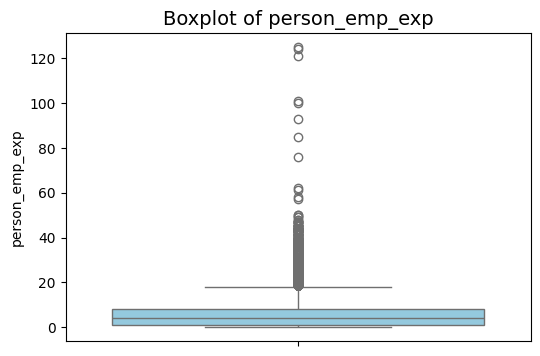

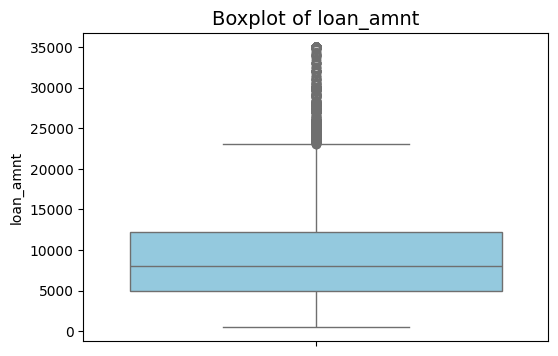

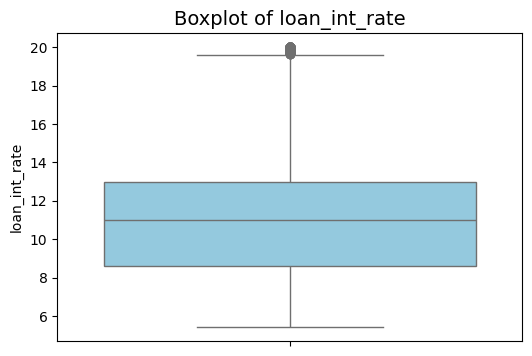

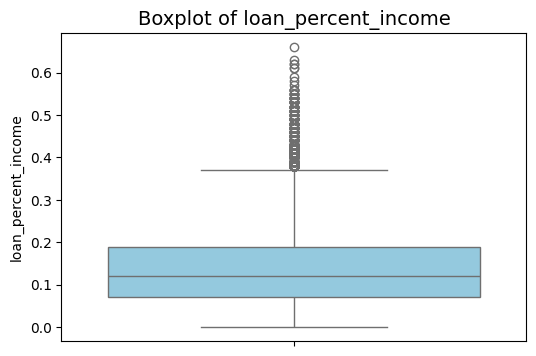

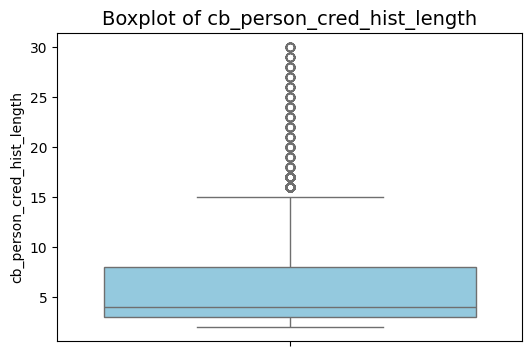

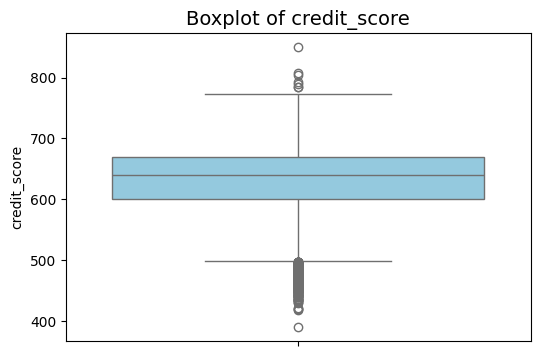

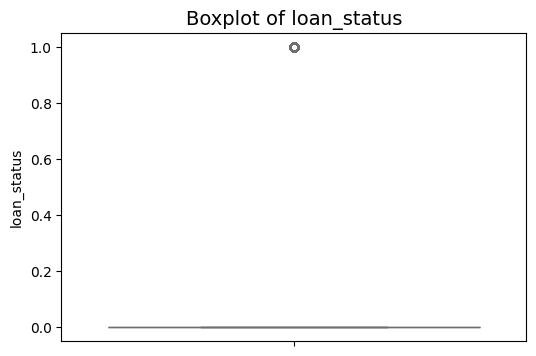

In [42]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.ylabel(col)
    plt.show()

In [40]:
df['person_income']

,person_income
0,71948.0
1,12282.0
2,12438.0
3,79753.0
4,66135.0
...,...
44995,47971.0
44996,65800.0
44997,56942.0
44998,33164.0


In [41]:
import numpy as np

col = 'person_income'
lower_cap = np.percentile(df[col], 1)
upper_cap = np.percentile(df[col], 99)

df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])


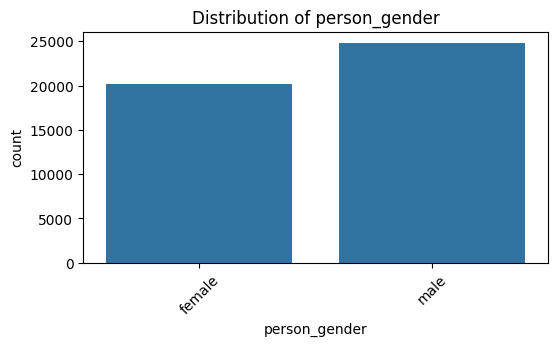

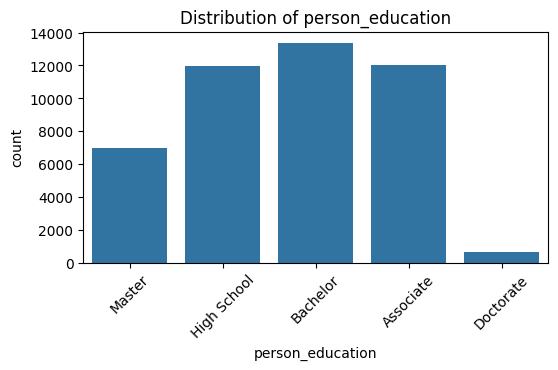

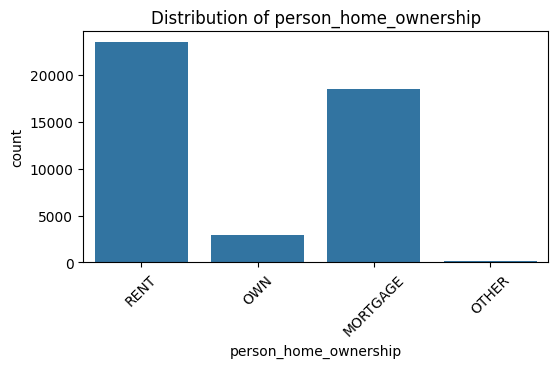

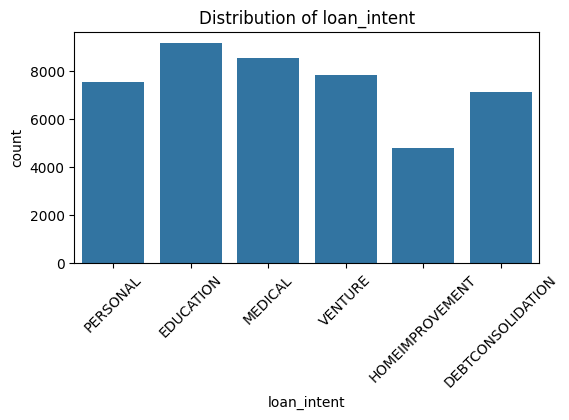

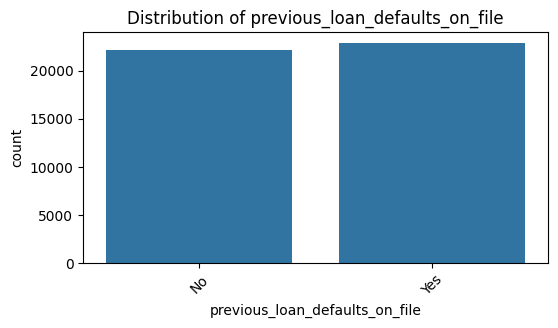

In [20]:
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

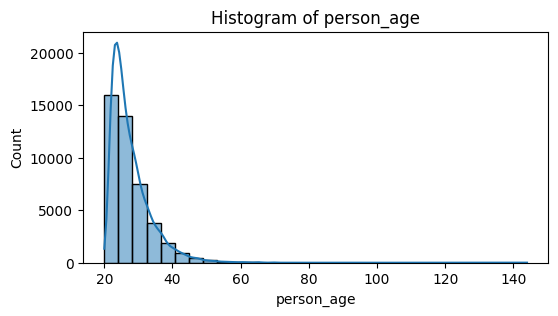

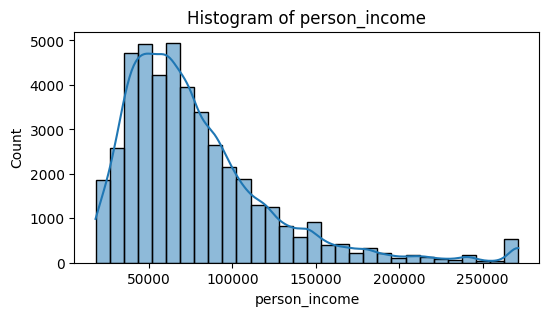

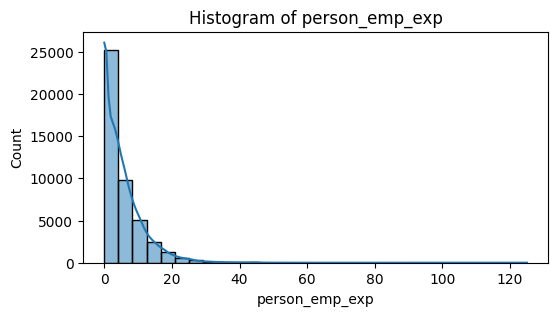

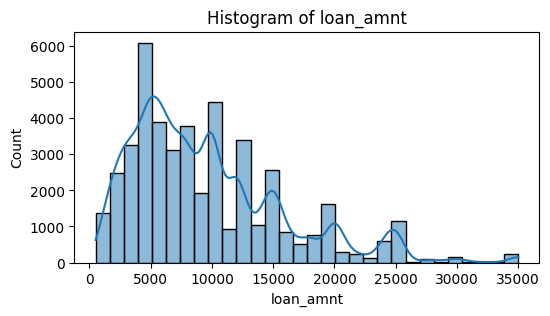

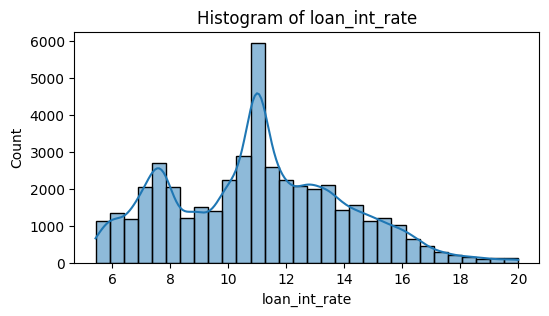

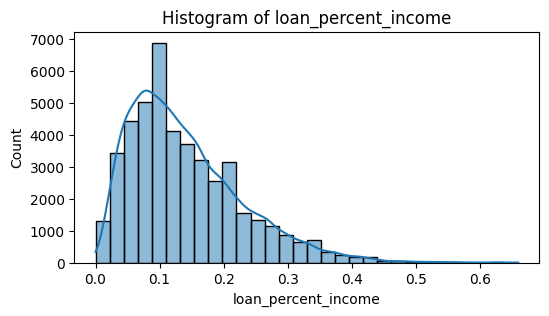

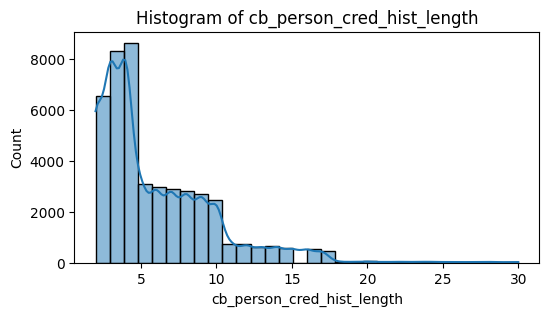

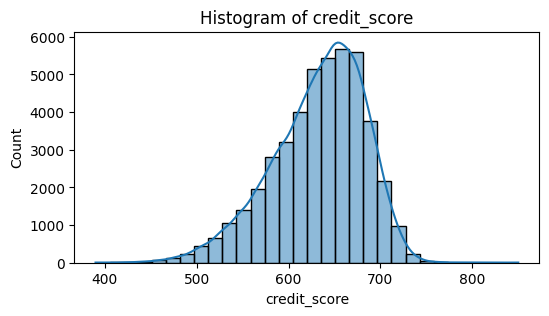

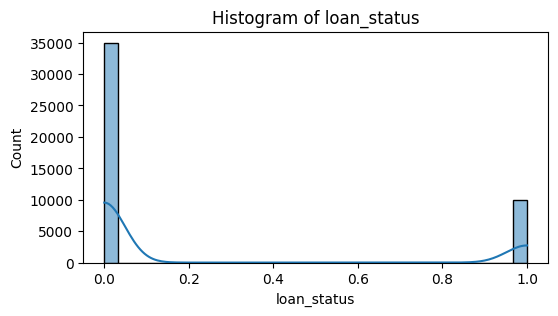

In [43]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

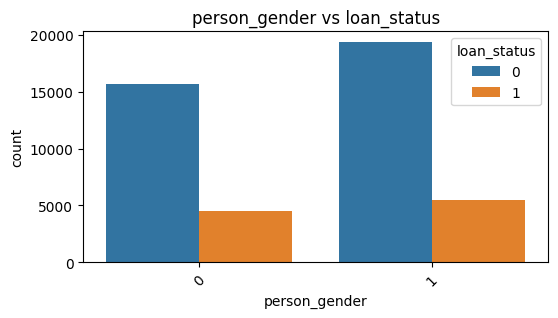

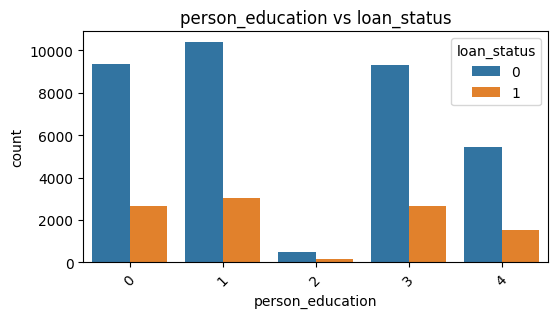

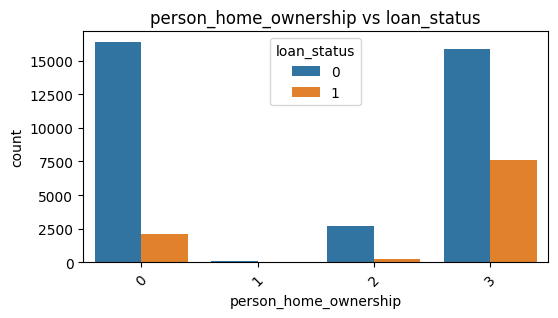

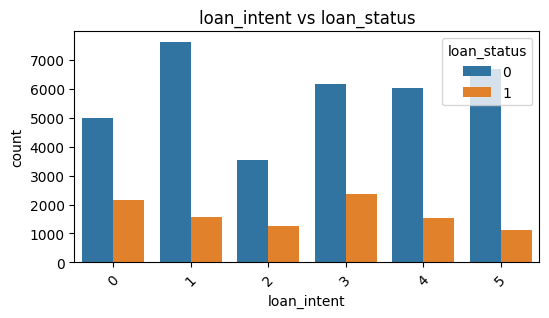

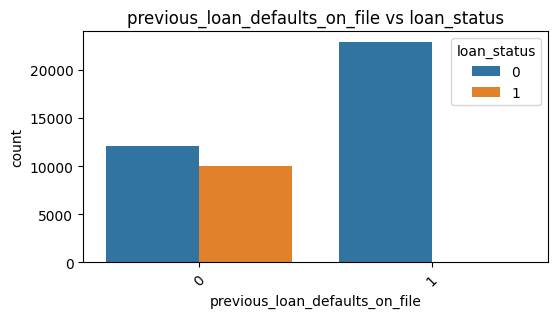

In [44]:
target = "loan_status"
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

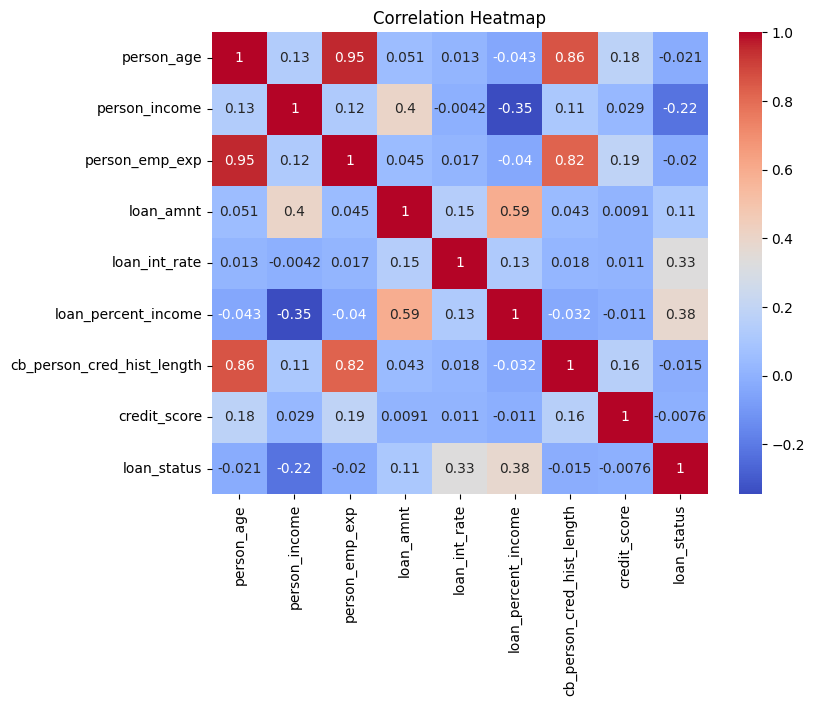

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [46]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [48]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = label_enc.fit_transform(df[col])

print(df.head())


   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4       71948.00               0   
1        21.0              0                 3       17875.95               0   
2        25.0              0                 3       17875.95               3   
3        23.0              0                 1       79753.00               0   
4        24.0              1                 4       66135.00               1   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      3    35000.0            4          16.02   
1                      2     1000.0            1          11.14   
2                      0     5500.0            3          12.87   
3                      3    35000.0            3          15.23   
4                      3    35000.0            3          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                    

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Size:", X_train.shape, "Testing Size:", X_test.shape)

Training Size: (31500, 13) Testing Size: (13500, 13)


In [63]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns


In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

In [75]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

X_train_cat = ohe.fit_transform(X_train[cat_cols]).toarray()
X_test_cat = ohe.transform(X_test[cat_cols]).toarray()
cat_feature_names = ohe.get_feature_names_out(cat_cols)
X_train_cat = pd.DataFrame(X_train_cat, columns=cat_feature_names, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=cat_feature_names, index=X_test.index)

In [73]:
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

previous_loan_defaults_on_file    0.222524
loan_percent_income               0.173334
loan_int_rate                     0.159376
person_income                     0.124876
person_home_ownership             0.061506
loan_amnt                         0.058679
credit_score                      0.057580
loan_intent                       0.034138
person_age                        0.030167
person_emp_exp                    0.027605
cb_person_cred_hist_length        0.025583
person_education                  0.016675
person_gender                     0.007958
dtype: float64


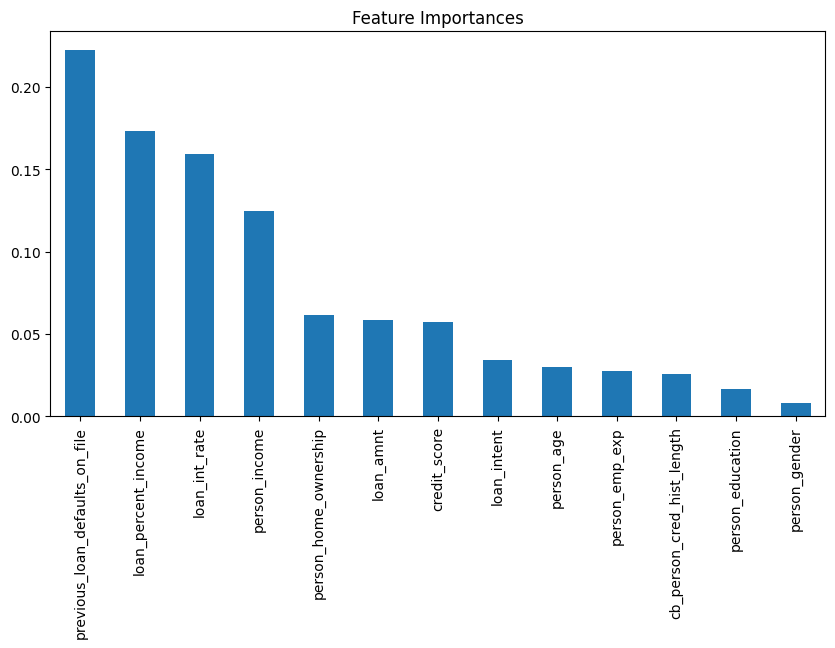

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print(feature_importance)

feature_importance.plot(kind='bar', figsize=(10, 5), title="Feature Importances")
plt.show()
